In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms.functional as transform
import torch
import torch as t
import itertools
import EnsembleXAI.Metrics as M

In [15]:
!kaggle competitions download -f "/ILSVRC/Data/CLS-LOC/train/n01491361/n01491361_9052.JPEG" -p ./images -c imagenet-object-localization-challenge --force


  0%|          | 0.00/82.7k [00:00<?, ?B/s]
100%|##########| 82.7k/82.7k [00:00<00:00, 4.11MB/s]


In [4]:
image = Image.open('PATH\\ImageNetS50\\train-semi-segmentation\\n01491361\\n01491361_9052.png')
x = transform.to_tensor(image)
x.shape

torch.Size([3, 480, 640])

In [5]:
t.all(x[0] == 0)

tensor(False)

In [6]:
logical_mask = t.any(x != 0, dim=-3, keepdim=True).squeeze()

In [7]:
t.all(logical_mask == 0)

tensor(False)

In [8]:
logical_mask.float()

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

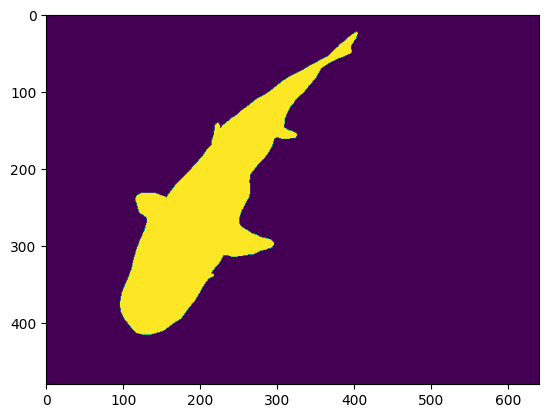

In [9]:
plt.imshow(logical_mask)
plt.show()

In [10]:
img = Image.open("PATH\\ImageNet\\n01491361\\n01491361_13773.JPEG")
x = transform.to_tensor(img)

In [11]:
logical_mask.shape

torch.Size([480, 640])

In [11]:
reshaped_mask = logical_mask.repeat(3,1,1)

In [12]:
x[reshaped_mask] = 0

In [13]:
x[0][180][250]

tensor(0.)

# Proper tests

In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms.functional as transform
import torch
import torch as t
import itertools
import EnsembleXAI.Metrics as M

In [15]:
masks = torch.BoolTensor([[[False, True, False]]]).repeat(2,3,1)
masks

tensor([[[False,  True, False],
         [False,  True, False],
         [False,  True, False]],

        [[False,  True, False],
         [False,  True, False],
         [False,  True, False]]])

In [16]:
images = torch.Tensor([[[[1,2,3], [4,5,6], [7,8,9]], [[1,2,3], [4,5,6], [7,8,9]], [[1,2,3], [4,5,6], [7,8,9]]]]).repeat(2,1,1,1)
masks = torch.BoolTensor([[[False, True, False], [False, True, False], [False, True, False]]]).repeat(2,1,1)
images.shape, masks.shape

(torch.Size([2, 3, 3, 3]), torch.Size([2, 3, 3]))

In [17]:
x = M.replace_masks(images, masks, 0.1)

In [18]:
torch.all(x[:, :, :, 1]==0.1)

tensor(True)

In [19]:
torch.all(x[:, :, :, [0,2]] == images[:, :, :, [0,2]])

tensor(True)

In [20]:
def replace_masks(images: torch.Tensor, masks: torch.Tensor, value = 0) -> torch.Tensor:
    temp_images = torch.clone(images)
    reshaped_masks = masks.unsqueeze(dim=1).repeat(1, 3, 1, 1)
    temp_images[reshaped_masks] = value
    return temp_images

In [21]:
masks

tensor([[[False,  True, False],
         [False,  True, False],
         [False,  True, False]],

        [[False,  True, False],
         [False,  True, False],
         [False,  True, False]]])

In [22]:
images.shape

torch.Size([2, 3, 3, 3])

In [23]:
[x.shape for x in M.tensor_to_list_tensors(images, 2)]

[torch.Size([3, 3]),
 torch.Size([3, 3]),
 torch.Size([3, 3]),
 torch.Size([3, 3]),
 torch.Size([3, 3]),
 torch.Size([3, 3])]

In [24]:
torch.linalg.matrix_norm(torch.ones([3,3]))

tensor(3.)

In [25]:
M.matrix_2_norm(2*torch.ones(4,4,4), torch.zeros(4,4,4), sum_dim=-1)

tensor(16.)

In [26]:
plus_2d = torch.Tensor([[0, 1, 0],
                                [1, 1, 1],
                                [0, 1, 0]])
cross_2d = torch.Tensor([[1, 0, 1],
                         [0, 1, 0],
                         [1, 0, 1]])
intersect = M.intersection_mask(plus_2d, cross_2d)

In [27]:
intersect[1,1] = False

In [28]:
torch.any(intersect)

tensor(False)

In [29]:
plus_threshold_2d = torch.Tensor([[0, 0.2, 0],
                                          [0.5, 0.7, 0.5],
                                          [0, 0.2, 0]])
blus_threshold_2d = torch.Tensor([[0, 1, 0],
                                  [1, 1, 1],
                                  [0, 1, 0]])
intersect = M.intersection_mask(plus_threshold_2d, blus_threshold_2d, threshold1=0.3)

In [30]:
intersect

tensor([[False, False, False],
        [ True,  True,  True],
        [False, False, False]])

In [31]:
intersect[1]

tensor([True, True, True])

In [32]:
plus_2d = torch.Tensor([[0, 1, 0],
                        [1, 1, 1],
                        [0, 1, 0]])
cross_2d = torch.Tensor([[1, 0, 1],
                         [0, 1, 0],
                         [1, 0, 1]])
union = M.union_mask(plus_2d, cross_2d)

In [33]:
union

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [34]:
union_threshold_a = torch.Tensor([[1, 0.4, 1],
                                  [1, 0.4, 1],
                                  [0, 0, 0]])
union_threshold_b = torch.Tensor([[0, 0, 0],
                                  [0, 0, 0],
                                  [0.6, 0.6, 0.6]])
union = M.union_mask(union_threshold_a, union_threshold_b, threshold1=0.5)

In [35]:
union

tensor([[ True, False,  True],
        [ True, False,  True],
        [ True,  True,  True]])

In [36]:
correct_union_05 = torch.BoolTensor([[True, False,  True],
                                     [True, False,  True],
                                     [True,  True,  True]])
torch.all(union==correct_union_05)

tensor(True)

In [37]:
ones = torch.Tensor([1]).repeat(3, 4, 10, 10)
twos = 2*torch.Tensor([1]).repeat(3, 4, 10, 10)
tensor = torch.cat([ones, twos])
xyz = M.tensor_to_list_tensors(tensor, depth=2)
diffs = [
    M.matrix_2_norm(exp1, exp2).item()
    for exp1, exp2 in itertools.combinations(xyz, 2)
]

In [38]:
torch.cat([ones, twos]).shape

torch.Size([6, 4, 10, 10])

In [39]:
1/(max(diffs)+1)

0.09090909879069752

In [40]:
M.consistency(tensor)
# test confidence impact ratio i decision impact ratio i stability i wszystko xd

0.09090910106897354

# TEST STABILITY

In [41]:
M.stability

<function EnsembleXAI.Metrics.stability(explanator: Callable, image: torch.Tensor, images_to_compare: torch.Tensor, epsilon: float = 0.1) -> torch.Tensor>

In [2]:
def predict_dummy(tensor: torch.Tensor, classes=1000):
    return torch.ones([tensor.shape[0], classes])/classes

In [43]:
n = 100
images_tensor = torch.ones([n, 3, 32, 32])
expls = torch.randn([n, 1, 32, 32])

In [44]:
a, b = M._impact_ratio_helper(images_tensor, predict_dummy, expls, 0, 0.5)

In [45]:
torch.all(a==0.0010)

tensor(True)

In [46]:
c, d = torch.max(a, 1)

In [47]:
(d == torch.zeros([100])).float()

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [48]:
n = 100
images_tensor = torch.ones([n, 3, 32, 32])
expls = torch.randn([n, 1, 32, 32])
baseline = 0
threshold = 0.5
org = M.decision_impact_ratio(images_tensor, predict_dummy, expls, threshold, baseline)

In [49]:
org

0.0

In [50]:
b.shape

torch.Size([100, 1000])

In [51]:
n = 100
images_tensor = torch.ones([n, 3, 32, 32])
expls = torch.randn([n, 1, 32, 32])
baseline = 0
threshold = 0.5
value = M.confidence_impact_ratio(images_tensor, predict_dummy, expls, threshold, baseline)

In [52]:
value

0.0

In [53]:
simple_explanation = plus_2d.unsqueeze(0).unsqueeze(0)/2
simple_mask = plus_2d.unsqueeze(0)
M.accordance_recall(simple_explanation, simple_mask, threshold=0.6)

tensor([0.])

In [54]:
def val(expl, mask, metric):
    expl = expl.unsqueeze(0).unsqueeze(0)
    mask = mask.unsqueeze(0)
    return metric(expl, mask)

In [55]:
val(plus_2d, cross_2d, M.accordance_recall)

tensor([0.2000])

In [56]:
val(cross_2d, plus_2d, M.accordance_recall)

tensor([0.2000])

In [57]:
val(plus_2d, plus_2d, M.accordance_recall)

tensor([1.])

In [58]:
val(plus_2d, cross_2d, M.accordance_precision).item()

0.20000000298023224

In [59]:
val(cross_2d, plus_2d, M.accordance_precision).item()

0.20000000298023224

In [60]:
val(plus_2d, plus_2d, M.accordance_precision).item()

1.0

In [61]:
expl = torch.cat((plus_2d.unsqueeze(0).unsqueeze(0), cross_2d.unsqueeze(0).unsqueeze(0)))
mask = torch.cat((cross_2d.unsqueeze(0), plus_2d.unsqueeze(0)))
acc_recall = M.accordance_recall(expl, mask)
acc_prec = M.accordance_precision(expl, mask)

In [62]:
values = 2 * (acc_recall * acc_prec) / (acc_recall + acc_prec)
value = torch.sum(values) / values.shape[0]

In [63]:
values

tensor([0.2000, 0.2000])

In [64]:
value

tensor(0.2000)

In [65]:
M.F1_score(expl, mask)

0.20000001788139343

In [70]:
M.intersection_over_union(expl, mask)

0.1111111119389534

In [66]:
acc_prec

tensor([0.2000, 0.2000])

In [67]:
acc_recall

tensor([0.2000, 0.2000])

In [68]:
squeezed_expl = expl.squeeze(dim=1)
overlaping_area = M.intersection_mask(squeezed_expl, mask, threshold1=threshold)
divisor = torch.sum(torch.abs(squeezed_expl) > threshold, dim=(-2, -1))
value = torch.sum(overlaping_area, dim=(-2, -1)) / divisor

In [69]:
torch.sum(overlaping_area, dim=(-2, -1))/divisor

tensor([0.2000, 0.2000])

In [76]:
def predict_dummy2(input_tensor, n_classes = 1000):
    n = input_tensor.shape[0]
    half_classes = n_classes//2
    third_classes = n_classes//3
    quarter_classes = n_classes//4
    if torch.sum(input_tensor).item() > 300000:
        preds = torch.cat([torch.zeros([n, n_classes - quarter_classes]), 0.004*torch.ones([n, quarter_classes])], dim=1)
    elif torch.sum(input_tensor).item() > 200000:
        preds = torch.cat([torch.zeros([n, n_classes - third_classes]), 0.0033*torch.ones([n, third_classes])], dim=1)
    else:
        preds = torch.cat([torch.zeros([n, n_classes - half_classes]), 0.002*torch.ones([n, half_classes])], dim=1)
    return preds

In [70]:
n = 100
images_tensor = torch.ones([n, 3, 32, 32])
expls = torch.Tensor([0, 0.3, 0.6, 1]).repeat(8).repeat(n, 3, 32, 1)
val = M.decision_impact_ratio(images_tensor, predict_dummy2, expls, 0, 0)

In [79]:
val1 = Metrics.confidence_impact_ratio(images_tensor, predict_dummy2, expls, 0, 0.4)
val2 = Metrics.confidence_impact_ratio(images_tensor, predict_dummy2, expls, 0, 0.7)
val3 = Metrics.confidence_impact_ratio(images_tensor, predict_dummy2, expls, 0, 1)

0.0020000000949949026

In [80]:
M.confidence_impact_ratio(images_tensor, predict_dummy2, expls, 0, 0.7)

0.0007000001496635377

In [81]:
M.confidence_impact_ratio(images_tensor, predict_dummy2, expls, 0, 1)

0.0

In [66]:
n = images_tensor.shape[0]
# predictor returns probabilities in a tensor format
probs_original, probs_modified = M._impact_ratio_helper(
    images_tensor, predict_dummy2, expls, 0.4, 1
)
_, preds_original = torch.max(probs_original, 1)
_, preds_modified = torch.max(probs_modified, 1)
value = torch.sum((preds_original != preds_modified).float()) / n
value.item()

0.0

In [65]:
torch.sum((preds_original != preds_original).float()) / n

tensor(0.)

In [67]:
preds_original

tensor([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500])

In [69]:
torch.randperm(1000)

tensor([556, 466, 330,  63, 191, 248, 247, 597, 627, 593, 342,  88, 805,  48,
        497, 927, 414,  10, 172, 483, 322, 541, 546, 812, 345, 306, 973, 720,
        791, 280, 142, 361, 341,  90, 440, 569, 473, 408, 178, 809,  85, 856,
        486, 507, 685, 846,  70, 423, 150, 618, 332, 438, 229, 350, 505, 687,
        580, 922, 759, 782,  95, 517,  55, 106, 279, 170, 481, 625, 140, 174,
        815, 747, 987,  27, 651, 222, 143, 993, 590, 221, 722, 427, 159, 941,
        925,  20, 207, 230, 774, 193, 412, 596, 695, 908, 617,  25, 863, 628,
        296, 775, 691, 660, 565, 594, 990, 688, 595, 708,   1, 948, 545,  93,
        398, 642, 474,  14, 634, 581, 970, 820, 454,  81, 111, 723, 269, 255,
        553,  38, 587, 681, 301,  66, 124, 935, 883, 647, 773, 844, 311, 664,
        869, 656, 853,  43, 224,  26, 392, 500, 323, 919,  29, 694,  87, 540,
        740, 967, 793, 889, 674, 435, 395, 356, 963, 145, 547, 710, 756, 792,
        607, 952, 499, 934, 234, 271, 119, 989, 104, 671, 112, 7

In [82]:
n = 100
images_tensor = torch.ones([n, 3, 32, 32])
expls = torch.Tensor([0, 0.3, 0.6, 1]).repeat(8).repeat(n, 3, 32, 1)
org, mod = M._impact_ratio_helper(
    images_tensor, predict_dummy2, expls, 0.4, 0
)

In [86]:
org[:, :750]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [84]:
mod

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0020, 0.0020, 0.0020],
        [0.0000, 0.0000, 0.0000,  ..., 0.0020, 0.0020, 0.0020],
        [0.0000, 0.0000, 0.0000,  ..., 0.0020, 0.0020, 0.0020],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0020, 0.0020, 0.0020],
        [0.0000, 0.0000, 0.0000,  ..., 0.0020, 0.0020, 0.0020],
        [0.0000, 0.0000, 0.0000,  ..., 0.0020, 0.0020, 0.0020]])

In [1]:
import torch
import EnsembleXAI.Metrics as M

In [ ]:
M.intersection_mask()

In [44]:
cross_2d = torch.Tensor([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
cross_2d

tensor([[1., 0., 1.],
        [0., 1., 0.],
        [1., 0., 1.]])

In [46]:
plus_2d = torch.Tensor([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
plus_2d

tensor([[0., 1., 0.],
        [1., 1., 1.],
        [0., 1., 0.]])

In [48]:
M.intersection_mask(cross_2d, plus_2d)

torch.Tensor

In [52]:
M.union_mask(cross_2d, plus_2d)

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [53]:
cross_2d_small = 0.4*cross_2d
plus_2d_small = 0.7*plus_2d
M.intersection_mask(cross_2d_small, plus_2d_small, threshold1=0.5)

In [55]:
M.intersection_mask(cross_2d_small, plus_2d_small, threshold1=0.5)

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])

In [58]:
M.union_mask(cross_2d_small, plus_2d_small, threshold1=0.0, threshold2=0.8)

tensor([[ True, False,  True],
        [False,  True, False],
        [ True, False,  True]])

In [60]:
torch.stack([torch.ones([3,5,5]), 0.5*torch.ones([3,5,5])]).shape

torch.Size([2, 3, 5, 5])

In [84]:
data = torch.stack([torch.ones(3, 5, 5), torch.zeros(3,5,5)])

In [90]:
ex_explanation = torch.Tensor([1, 0, 0, 0, 0]).repeat(2, 3, 5, 1)

In [86]:
data[0,0,0,0]

tensor(1.)

In [94]:
def predictor(input_tensor):
    n = input_tensor.shape[0]
    if input_tensor[0,0,0,0].item() == 1:
        val = torch.Tensor([0.8, 0.2, 0]).repeat(n, 1)
    else:
        val = torch.Tensor([0.2, 0.6, 0.2]).repeat(n, 1)
    return val

In [88]:
predictor(data)

tensor([[0.8000, 0.2000, 0.0000],
        [0.8000, 0.2000, 0.0000]])

In [95]:
M.confidence_impact_ratio(data, predictor, ex_explanation, 0.5, 0)

0.19999998807907104

In [109]:
cross_2d = torch.Tensor([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
plus_2d = torch.Tensor([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
a = torch.stack([cross_2d.repeat(3,1,1), plus_2d.repeat(3,1,1)])
b = torch.stack([plus_2d, cross_2d])

In [110]:
M.accordance_recall(a, b)

tensor([0.2000, 0.2000])

In [111]:
M.accordance_precision(a, b)

tensor([0.2000, 0.2000])

In [113]:
M.intersection_over_union(a, b)

0.3333333432674408

In [14]:
images = torch.Tensor([0, 0.2, 0.4, 0.6, 0.8]).repeat(4,3,5,1)
image = torch.Tensor([0.1, 0.3, 0.5, 0.7, 0.9]).repeat(3,5,1)
M.matrix_2_norm(images, image, sum_dim=1)

tensor([0.8660, 0.8660, 0.8660, 0.8660])

In [15]:
torch.sum(images), torch.sum(image)

(tensor(120.), tensor(37.5000))

In [17]:
def _explain_dummy(imagez_tensor):
    summed = torch.sum(imagez_tensor)
    n = imagez_tensor.shape[0]
    if summed > 100:
        explanation = torch.Tensor([0,0,0,1,1]).repeat(n, 3, 5, 1)
    else:
        explanation = torch.Tensor([0,0,1,1,0]).repeat(n, 3, 5, 1)
    return explanation

In [18]:
M.stability(_explain_dummy, image, images, 1)

0.13370312750339508